In [1]:
import itertools, os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.io.ascii as at
from astropy import table
from scipy.interpolate import interp1d

In [2]:
poster_figure = (12,7)
talk_figure = (10,6.5)
single_figure = (8,8)
double_figure = (13,6)
double_stacked = (6,13)
triple_stacked = (6,14)
quad_square = (13,10)
proposal_figure = (10,5.5)

std_ms = 9
std_mew = 1.5

In [43]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = single_figure
mpl.rcParams['lines.markeredgewidth'] = 1.5
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.direction'] = "in"
# mpl.rcParams[''] = 


# mpl.rcParams['axes.prop_cycle'] = cycler('color',cmap_qual)

In [4]:
model_dir = os.path.expanduser("~/Dropbox/Models/")
cat_dir = os.path.expanduser("~/Dropbox/data/catalogs/")

# Set up necessary conversions to stellar mass

In [5]:
kh = at.read(os.path.join(model_dir,"kraushillenbrand5.dat"))
print(kh.dtype)

[('SpT', '<U2'), ('Mu', '<f8'), ('Mg', '<f8'), ('Mr', '<f8'), ('Mi', '<f8'), ('Mz', '<f8'), ('MJ', '<f8'), ('MH', '<f8'), ('MK', '<f8'), ('Mbol', '<f8'), ('Teff', '<i8'), ('Mass', '<f8')]


In [6]:
kh_teff_mass = interp1d(kh["Teff"],kh["Mass"],bounds_error=False)
kh_jk_mass = interp1d(kh["MJ"]-kh["MK"],kh["Mass"],bounds_error=False)
kh_gr_mass = interp1d(kh["Mg"]-kh["Mr"],kh["Mass"],bounds_error=False)

In [7]:
pm_table = at.read(os.path.join(model_dir,"pecaut_mamajek_2013_table5.dat"),data_start=3)
print(pm_table.dtype)
pm_mass = kh_teff_mass(pm_table["Teff"])
# print(pm_mass)
good = np.isfinite(pm_mass)
print(pm_mass[good])
print(pm_table["B-V"][good])

[('SpT', '<U5'), ('Teff', '<i8'), ('BCV', '<f8'), ('U-B', '<f8'), ('B-V', '<f8'), ('V-Rc', '<f8'), ('V-Ic', '<f8'), ('V-J', '<f8'), ('V-H', '<f8'), ('V-Ks', '<f8'), ('K-W1', '<f8'), ('K-W2', '<f8'), ('K-W3', '<f8'), ('K-W4', '<f8')]
[3.34621849 3.23277311 2.96806723 2.60909091 2.33246753 2.18181818
 2.03636364 1.96129032 1.93548387 1.87096774 1.75789474 1.72631579
 1.6        1.54516129 1.45555556 1.40555556 1.36111111 1.28888889
 1.21666667 1.18333333 1.15235294 1.11352941 1.07764706 1.06588235
 1.04       1.025      1.013      1.007      0.986      0.97
 0.96       0.9225     0.9075     0.88171429 0.852      0.80645161
 0.75677419 0.72083333 0.6637931  0.62809524 0.61285714 0.59571429
 0.59       0.54       0.44823529 0.330625   0.21058824 0.16176471
 0.11666667 0.10533333 0.0999     0.0915    ]
 B-V 
-----
-0.07
-0.05
  0.0
0.043
0.074
 0.09
 0.14
 0.16
 0.17
 0.21
  ...
1.418
1.431
1.484
  1.5
1.544
1.661
1.874
  2.0
 2.06
 2.13
   --
Length = 52 rows


In [8]:
pm_bv_mass = interp1d(pm_table["B-V"][good],pm_mass[good],bounds_error=False)
pm_vk_mass = interp1d(pm_table["V-Ks"][good],pm_mass[good],bounds_error=False)

In [9]:
sol_lim = {"mass":[0.8,1.2], "V-K": [1.1,1.8], "B-V": [0.5,0.8], "logTeff": [3.7,3.8]}

In [10]:
godoy_rivera = at.read(os.path.join(cat_dir,"godoyrivera2021_rotation.dat"),data_start=3)
godoy_rivera.dtype
memb = (godoy_rivera["Class"]=="probable-member") | (godoy_rivera["Class"]=="possible-member")

In [11]:
curtis = at.read(os.path.join(cat_dir,"curtis2020_rotation.dat"),data_start=3)
curtis.dtype

dtype([('Cluster', '<U12'), ('Age', '<f8'), ('Av', '<f8'), ('GaiaDR2', '<i8'), ('OName', '<U14'), ('RA_ICRS', '<f8'), ('DE_ICRS', '<f8'), ('BP-RP', '<f8'), ('(BP-RP)0', '<f8'), ('Gmag', '<f8'), ('GMag', '<f8'), ('Teff', '<f8'), ('Prot', '<f8'), ('R147', '<i8'), ('Simbad', '<U6'), ('_RA.icrs', '<f8'), ('_DE.icrs', '<f8')])

# Read in cluster data

In [12]:
onc1 = at.read(os.path.join(cat_dir,"ONC_rotation_herbst2002_compilation.tsv"),data_start=3)
print(onc1.dtype)
onc_per = np.asarray(onc1["Per"])
onc_mass = np.asarray(onc1["Mass"])

[('ID', '<i8'), ('Per', '<f8'), ('r_Per', '<U4'), ('LogT', '<f8'), ('LogL', '<f8'), ('Mass', '<f8'), ('Delta(I-K)', '<f8'), ('H97', '<U3')]


In [13]:
ngc6530 = at.read(os.path.join(cat_dir,"ngc6530_rotation_henderson2012.tsv"),data_start=3)
print(ngc6530.dtype)
ngc6530_mass = ngc6530["Mass"]
ngc6530_per = ngc6530["Per"]

[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('XID', '<i8'), ('WFI', '<i8'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('Vmag', '<f8'), ('Imag', '<f8'), ('Per', '<f8'), ('u_Per', '<U1'), ('Mass', '<f8'), ('Age', '<f8'), ('Lbol', '<f8'), ('Rad', '<f8'), ('logLX', '<f8'), ('IR?', '<U1'), ('Ha', '<U1'), ('r_Ha', '<U1'), ('SB2?', '<U1'), ('P', '<i8'), ('Simbad', '<U6')]


In [14]:
usco = at.read(os.path.join(cat_dir,"usco_rhooph_rotation_rebull2018.csv"),data_start=3)
print(usco.dtype)
usco_memb = (usco["Memb"]=="USco,bronze") | (usco["Memb"]=="USco,silver") | (usco["Memb"]=="USco,gold") 
usco_mass = pm_vk_mass(np.asarray(usco["(V-Ks)0"][usco_memb]))
usco_per = usco["Per1"][usco_memb]

[('EPIC', '<i8'), ('RAJ2000', '<U11'), ('DEJ2000', '<U11'), ('OName', '<U29'), ('Vmag', '<f8'), ('Ksmag', '<f8'), ('(V-Ks)o', '<f8'), ('(V-Ks)u', '<f8'), ('E(V-Ks)', '<f8'), ('Ksmag0', '<f8'), ('(V-Ks)0', '<f8'), ('n_(V-Ks)', '<i8'), ('n_(V-Ks)0', '<i8'), ('Per1', '<f8'), ('Per2', '<f8'), ('Per3', '<f8'), ('Per4', '<f8'), ('Memb', '<U11'), ('Disk', '<U5'), ('DStart', '<U10'), ('Dip', '<U3'), ('Burst', '<U3'), ('Multi', '<U6'), ('DD', '<U3'), ('DDmove', '<U3'), ('Shch', '<U3'), ('Beat', '<U3'), ('CPeak', '<U3'), ('RClose', '<U3'), ('RDist', '<U3'), ('Pulse', '<U3'), ('SimbadName', '<U14')]


In [15]:
hper = at.read(os.path.join(cat_dir,"hper_rotation_moraux2013.tsv"),data_start=3)
print(hper.dtype)
hper_mass = hper["Mass"]
hper_per = hper["Per"]

[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('Seq', '<i8'), ('RAJ2000', '<U11'), ('DEJ2000', '<U11'), ("i'mag", '<f8'), ('Per', '<f8'), ('Power', '<f8'), ('l_FAP', '<U1'), ('FAP', '<f8'), ('Amp', '<f8'), ('Mass', '<f8'), ('bin', '<i8'), ('Vmag', '<f8'), ('Icmag', '<f8'), ('Jmag', '<f8'), ('Hmag', '<f8'), ('Kmag', '<f8'), ('Mmb', '<i8'), ('XH', '<U4')]


In [16]:
ngc2547 = godoy_rivera[(godoy_rivera["Cluster"]=="NGC2547") & memb]
ngc2547_per = ngc2547["Period"]
ngc2547_mass = ngc2547["Mass"]

In [17]:
zams = at.read(os.path.expanduser("~/projects/TESS_young/tab_all_stars.csv"))
good = zams["Q1"]==0
zams_mass = zams["Mass"][good]
zams_per = zams["Prot1"][good]

In [18]:
alphaper = at.read(os.path.join(cat_dir,"alphaper_rotation_alejo.csv"))
print(alphaper.dtype)
good = (alphaper["Pmem"]>=60)
alphaper_per = alphaper["Prot"][good]
alphaper_mass = alphaper["mass"][good]

[('name', '<U7'), ('Identifier', '<U23'), ('RA', '<f8'), ('DEC', '<f8'), ('Pmem', '<f8'), ('R mag', '<f8'), ('Ks', '<f8'), ('z', '<f8'), ('K', '<f8'), ('mass', '<f8'), ('tau', '<f8'), ('Prot', '<f8'), ('r_Prot', '<U10'), ('binary?', '<U3')]


In [19]:
m35 = at.read(os.path.join(cat_dir,"M35_rotation_meibom2010.tsv"),
              delimiter="|",fill_values=("-99",np.nan)).filled(np.nan)
print(m35.dtype)
m35_solar = (m35["(B-V)0"]>=sol_lim["B-V"][0]) & (m35["(B-V)0"]<=sol_lim["B-V"][1])
m35_per = m35["Prot"]
m35_mass = pm_bv_mass(m35["(B-V)0"])

[('Seq', '<i8'), ('Prot', '<f8'), ('V0mag', '<f8'), ('(B-V)0', '<f8'), ('(V-I)0', '<f8'), ('o_RV', '<U2'), ('RV', '<f8'), ('e_RV', '<f8'), ('Mrv', '<U2'), ('Mpm', '<i8'), ('Mmb', '<U5'), ('W', '<f8'), ('State', '<U1'), ('Simbad', '<U6'), ('RAJ2000', '<U12'), ('DEJ2000', '<U13')]


In [20]:
pleiades = godoy_rivera[(godoy_rivera["Cluster"]=="Pleiades") & memb]
pleiades_per = pleiades["Period"]
pleiades_mass = pleiades["Mass"]

In [21]:
m50 = godoy_rivera[(godoy_rivera["Cluster"]=="M50") & memb]
m50_per = m50["Period"]
m50_mass = m50["Mass"]

In [22]:
ngc2516 = godoy_rivera[(godoy_rivera["Cluster"]=="NGC 2516") & memb]
ngc2516_per = ngc2516["Period"]
ngc2516_mass = ngc2516["Mass"]

In [23]:
m34meibom = at.read(os.path.join(cat_dir,"m34_rotation_meibom2011.tsv"))
print(m34meibom.dtype)
m34meibom_mass = pm_bv_mass(np.asarray(m34meibom["(B-V)0"][2:],np.float32))
m34meibom_per = np.asarray(m34meibom["Prot"][2:],np.float32)

[('Seq', '<U3'), ('RAJ2000', '<U11'), ('DEJ2000', '<U11'), ('Prot', '<U5'), ('V0mag', '<U5'), ('(B-V)0', '<U5'), ('o_RVel', '<U2'), ('RVel', '<U5'), ('e_RVel', '<U4'), ('PRV', '<U2'), ('PPM', '<U2'), ('Mm', '<U2'), ('Rot', '<U1'), ('JP96', '<U3')]


In [24]:
m34 = at.read(os.path.join(cat_dir,"m34_rotation_irwin2006.tsv"))
print(m34.dtype)
m34_mass = np.asarray(m34["Mass"][2:],np.float32)
m34_per = np.asarray(m34["Per"][2:],np.float32)
# print(m34_mass,m34_per)

[('M34', '<U6'), ('RAJ2000', '<U11'), ('DEJ2000', '<U11'), ('Vmag', '<U5'), ('Rcmag', '<U5'), ('Icmag', '<U5'), ('Hamag', '<U5'), ('Per', '<U6'), ('n_Per', '<U1'), ('AV', '<U6'), ('AI', '<U6'), ('Mass', '<U7'), ('Rad', '<U6'), ('JP', '<U3'), ('vsini', '<U4')]


In [25]:
ngc3532 = at.read(os.path.join(cat_dir,"ngc3532_rotation_fritzewski2021.dat"),
                  data_start=3)
ngc3532_per = ngc3532["Prot"]
ngc3532_mass = pm_bv_mass(ngc3532["(B-V)0"])

In [26]:
coma = at.read(os.path.join(cat_dir,"comaber_rotation_colliercameron2009_consolidated.csv"))
print(coma.dtype)
coma_per = coma["Period(days)"]
coma_mass = kh_jk_mass(coma["J-K"])

[('1SWASP', '<U19'), ('Season', '<i8'), ('Field_cam', '<U15'), ('Nobs', '<i8'), ('Period(days)', '<f8'), ('Period2(days)', '<f8'), ('Half?', '<U1'), ('Amplitude(mag)', '<f8'), ('SpT', '<U2'), ('J-K', '<f8')]


In [27]:
m37 = at.read(os.path.join(cat_dir,"M37_rotation_nunez2015_clean.tsv"),
             delimiter="|")
solar37 = (m37["Mass"]>=sol_lim["mass"][0]) & (m37["Mass"]<=sol_lim["mass"][1])
m37_per = m37["Per"]#[solar37]
print(m37.dtype)
m37_mass = m37["Mass"]

[('OID', '<i8'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('gmag', '<f8'), ('rmag', '<f8'), ('imag', '<f8'), ('Per', '<f8'), ('f_Per', '<f8'), ('Ps', '<f8'), ('Pb', '<f8'), ('Pmem', '<f8'), ('Mass', '<f8'), ('tau', '<f8'), ('Lbol', '<f8'), ('XID', '<i8'), ('O-X', '<f8'), ('ME08', '<i8'), ('oME08', '<f8'), ('OName', '<i8')]


In [28]:
ngc6866 = at.read(os.path.join(cat_dir,"ngc6866_rotation_balona2013.tsv"),
             delimiter="|")
print(ngc6866.dtype)
solar6866 = (ngc6866["logTe"]>=sol_lim["logTeff"][0]) & (ngc6866["logTe"]<=sol_lim["logTeff"][1])
ngc6866_per = 2 * np.pi / ngc6866["f1"]
ngc6866_mass = kh_teff_mass(10**ngc6866["logTe"])

[('X', '<i8'), ('KIC', '<i8'), ('Mm', '<U1'), ('JJ', '<i8'), ('Dist', '<f8'), ('RAJ2000', '<U8'), ('DEJ2000', '<U9'), ('Cad', '<U1'), ('kepmag', '<f8'), ('logTe', '<f8'), ('logL', '<f8'), ('f1', '<f8'), ('Amp', '<f8')]


In [29]:
# PRAESEPE AND HYADES
praesepe = curtis[curtis["Cluster"]=="Praesepe"]
praesepe_per = praesepe["Prot"]
praesepe_mass = kh_teff_mass(praesepe["Teff"])

In [30]:
ngc6811 = curtis[curtis["Cluster"]=="NGC 6811"]
ngc6811_per = ngc6811["Prot"]
ngc6811_mass = kh_teff_mass(ngc6811["Teff"])

In [31]:
ngc752 = curtis[curtis["Cluster"]=="NGC 752"]
ngc752_per = ngc752["Prot"]
ngc752_mass = kh_teff_mass(ngc752["Teff"])

In [32]:
rup147 = curtis[curtis["Cluster"]=="Ruprecht 147"]
rup147_per = rup147["Prot"]
rup147_mass = kh_teff_mass(rup147["Teff"])

In [33]:
ngc6819 = curtis[curtis["Cluster"]=="NGC 6819"]
ngc6819_per = ngc6819["Prot"]
ngc6819_mass = kh_teff_mass(ngc6819["Teff"])

In [34]:
m67 = at.read(os.path.join(cat_dir,"M67_rotation_barnes2017.txt"),delimiter="\t")
print(m67.dtype)
m67_per = m67["P"]
m67_mass = pm_bv_mass(m67["B - V"])

[('EPIC', '<i8'), ('IDW', '<i8'), ('B - V', '<f8'), ('V', '<f8'), ('P', '<f8'), ('P_err', '<f8'), ('Groups', '<U5'), ('Member', '<U2'), ('Comment', '<U24')]


In [35]:
m67_2 = at.read(os.path.join(cat_dir,"m67_rotation_dungee2022.csv"))
m67_per2 = m67_2["prot"]
m67_mass2 = kh_teff_mass(m67_2["teff"])

In [36]:
mearth = at.read(os.path.join(cat_dir,"mearth_rotation_newton2018.tsv"),data_start=3)
print(mearth.dtype)
good = (mearth["Type"]=="A") | (mearth["Type"]=="B")
mearth_per = np.asarray(mearth["Per"][good],np.float32)
# mearth_mass = np.asarray(mearth["Mass"][good],np.float32)
mearth_mass = np.asarray(mearth["M*"][good],np.float32)

[('Type', '<U1'), ('2MASS', '<U16'), ('LSPM', '<U10'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('pmRA', '<f8'), ('pmDE', '<f8'), ('plx', '<f8'), ('e_plx', '<f8'), ('r_plx', '<U19'), ('Dist', '<f8'), ('RV', '<f8'), ('e_RV', '<f8'), ('r_RV', '<U19'), ('Per', '<f8'), ('Amp', '<f8'), ('e_Amp', '<f8'), ('M*', '<f8'), ('R*', '<f8'), ('Flag', '<i8'), ('NPts', '<i8'), ('NDays', '<i8'), ('magerr', '<f8'), ('F-test', '<i8'), ('Simbad', '<U6')]


In [37]:
kepler1 = at.read(os.path.join(cat_dir,"field_M_rotation_mcquillan2013.tsv"),data_start=3)
kepler2 = at.read(os.path.join(cat_dir,"field_rotation_mcquillan2014.tsv"),data_start=3)
print(kepler1.dtype)
print(kepler2.dtype)
kep_mass = np.append(np.asarray(kepler1["Mass"][2:],np.float32),np.asarray(kepler2["Mass"][2:],np.float32))
kep_per = np.append(np.asarray(kepler1["Per"][2:],np.float32),np.asarray(kepler2["Prot"][2:],np.float32))

[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('KIC', '<i8'), ('Teff', '<i8'), ('logg', '<f8'), ('f_logg', '<U1'), ('Mass', '<f8'), ('Per', '<f8'), ('e_Per', '<f8'), ('Amp', '<f8'), ('Flag', '<U2'), ('_RA', '<f8'), ('_DE', '<f8')]
[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('KIC', '<i8'), ('Teff', '<i8'), ('log(g)', '<f8'), ('Mass', '<f8'), ('Prot', '<f8'), ('e_Prot', '<f8'), ('n_Prot', '<U3'), ('Rper', '<f8'), ('LPH', '<f8'), ('w', '<f8'), ('Ref', '<i8'), ('_RA', '<f8'), ('_DE', '<f8')]


# Demonstrate rotation evolution in one figure

Solid points are NOW from Godoy-Rivera (and I'm now adding Curtis 2020); open points need membership analysis

Blue was for things newer than Gallet & Bouvier; making that black for more general use

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


<ipython-input-48-a27dd9a34ef3>:121: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes_orig[0,0].set_yticklabels(["","0.1","1","10"])


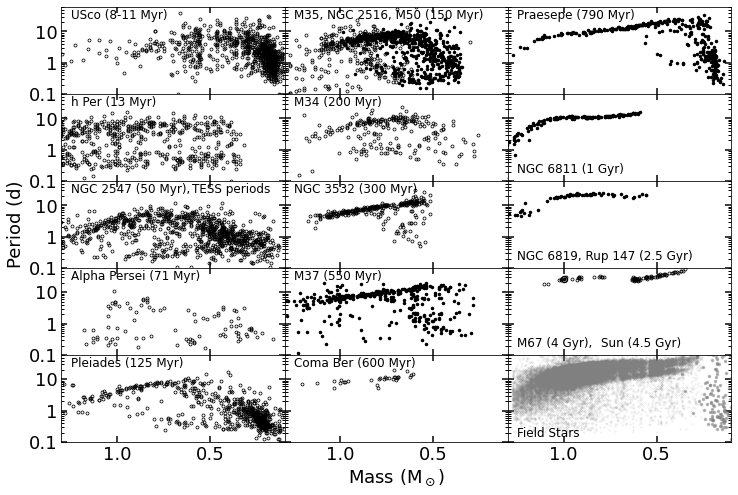

In [48]:
fig, axes_orig = plt.subplots(nrows=5,ncols=3,sharex=True,sharey=True,figsize=(12,8))
axes = axes_orig.T.flatten()
print(axes)

cluster_fontsize = 12
textx0, texty0 = 1.25, 25 #22

# gr_color = "C1"
gb_color = "k"
sg_color = "k"
new_color = "k"# "C0"

# ms=1.5

grc_params = {"ms":2}
need_params = {"ms":3,"mfc":"none","mew":0.75}



# Col 1 - PMS/ZAMS

axes[0].tick_params(labelbottom=False)
axes[0].plot(usco_mass,usco_per,'o',color=new_color,**need_params)
axes[0].text(textx0,texty0,"USco (8-11 Myr)",fontsize=cluster_fontsize,color=new_color)

axes[1].plot(hper_mass,hper_per,'o',color=gb_color,**need_params)
axes[1].tick_params(labelbottom=False)
axes[1].text(textx0,texty0,"h Per (13 Myr)",fontsize=cluster_fontsize,color=gb_color)

axes[2].plot(zams_mass, zams_per, 'o',color=new_color,**need_params)
axes[2].plot(ngc2547_mass,ngc2547_per,'o',ms=3,color=gb_color,mfc="none",mew=0.75)
axes[2].tick_params(labelbottom=False)
axes[2].text(textx0,texty0,"NGC 2547 (50 Myr), ",fontsize=cluster_fontsize)
axes[2].text(textx0-0.65,texty0,"TESS periods",fontsize=cluster_fontsize,color=new_color)


split = 0.7
axes[3].plot(alphaper_mass[alphaper_mass<split],alphaper_per[alphaper_mass<split],'o',color=new_color,**need_params)
axes[3].plot(alphaper_mass[alphaper_mass>=split],alphaper_per[alphaper_mass>=split],'o',color=gb_color,**need_params)
axes[3].tick_params(labelbottom=False)
axes[3].text(textx0,texty0,"Alpha Persei (71 Myr)",fontsize=cluster_fontsize,color=new_color)

axes[4].plot(pleiades_mass,pleiades_per,'o',color=gb_color,**need_params)
axes[4].text(textx0,texty0,"Pleiades (125 Myr)",fontsize=cluster_fontsize,color=gb_color)

# Col 2 - early MS OCs
              
axes[5].plot(ngc2516_mass,ngc2516_per,'o',color=gb_color,**grc_params)
axes[5].plot(m50_mass,m50_per,'o',color=gb_color,**grc_params)
axes[5].plot(m35_mass,m35_per,'o',color=gb_color,**need_params)
axes[5].tick_params(labelbottom=False)
axes[5].text(textx0,texty0,"M35, NGC 2516, M50 (150 Myr)",fontsize=cluster_fontsize,color=gb_color)

            
axes[6].plot(m34_mass,m34_per,'o',color=new_color,**need_params)
axes[6].plot(m34meibom_mass,m34meibom_per,'o',color=gb_color,**need_params)
axes[6].text(textx0,texty0,"M34 (200 Myr)",fontsize=cluster_fontsize,color=new_color)

axes[7].plot(ngc3532_mass,ngc3532_per,'o',color=new_color,**need_params)
axes[7].text(textx0,texty0,"NGC 3532 (300 Myr)",fontsize=cluster_fontsize,color=new_color)

axes[8].plot(m37_mass,m37_per,'o',color=gb_color,**grc_params)
axes[8].text(textx0,texty0,"M37 (550 Myr)",fontsize=cluster_fontsize,color=gb_color)

axes[9].plot(coma_mass,coma_per,'o',color=new_color,**need_params)
axes[9].text(textx0,texty0,"Coma Ber (600 Myr)",fontsize=cluster_fontsize,color=new_color)


# old OCs, Sun, field
textx1, texty1 = 1.25, 0.15


# TODO: distinguish my periods from the old ones
# TODO: add hyades periods
axes[-5].plot(praesepe_mass,praesepe_per,'o',color=gb_color,**grc_params)
axes[-5].text(textx0,texty0,"Praesepe (790 Myr)",fontsize=cluster_fontsize)
# axes[-5].plot(hyades_mass,hyades_per,'ko',ms=3)
# axes[-5].text(textx0,texty0,"HyPra (650 Myr)",fontsize=cluster_fontsize)

split = 0.9
axes[-4].plot(ngc6811_mass[ngc6811_mass>=split], ngc6811_per[ngc6811_mass>=split], 
              'o',color=gb_color,**grc_params)
axes[-4].plot(ngc6811_mass[ngc6811_mass<split], ngc6811_per[ngc6811_mass<split], 
              'o',color=gb_color,**grc_params)
axes[-4].text(textx1,texty1*1.2,"NGC 6811 (1 Gyr)",fontsize=cluster_fontsize,color=new_color)
             
axes[-3].plot(rup147_mass, rup147_per, 'o',color=new_color,**grc_params)
axes[-3].plot(ngc6819_mass[ngc6819_mass>=split], ngc6819_per[ngc6819_mass>=split], 
              'o',color=gb_color,**grc_params)
axes[-3].plot(ngc6819_mass[ngc6819_mass<split], ngc6819_per[ngc6819_mass<split], 
              'o',color=new_color,**grc_params)
axes[-3].text(textx1,texty1*1.2,"NGC 6819, Rup 147 (2.5 Gyr)",fontsize=cluster_fontsize,color=new_color)


axes[-2].plot(m67_mass, m67_per,'o',color=new_color,**need_params)
axes[-2].plot(m67_mass2, m67_per2, 'o',color=new_color,**need_params)
axes[-2].plot([1.0],[27],'ko',ms=2)
axes[-2].plot([1.0],[27],'ko',ms=6,mfc="none")
axes[-2].text(textx1,texty1*1.2,"M67 (4 Gyr), ",fontsize=cluster_fontsize,color=new_color)
axes[-2].text(textx1-0.45,texty1*1.2,"Sun (4.5 Gyr)",fontsize=cluster_fontsize,color=gb_color)


axes[-1].plot(mearth_mass,mearth_per,'o',color="Grey",alpha=0.5,ms=2)
axes[-1].plot(kep_mass,kep_per,'.',ms=1,alpha=0.2,color="Grey")
axes[-1].text(textx1,texty1,"Field Stars",fontsize=cluster_fontsize)

axes_orig[0,0].set_xlim(1.3,0.1)
axes_orig[0,0].set_ylim(0.1,30)

plt.subplots_adjust(hspace=0,wspace=0)

axes_orig[2,0].set_ylabel("Period (d)")
# axes_orig[-1,0].set_xlabel(r"Mass (M$_\odot$)")
axes_orig[-1,1].set_xlabel(r"Mass (M$_\odot$)")
# axes_orig[-1,2].set_xlabel(r"Mass (M$_\odot$)")

# plt.savefig("cluster_periods_linear.pdf",bbox_inches="tight")

axes_orig[0,0].set_ylim(0.1,60)
axes_orig[0,0].set_yscale("log")
axes_orig[0,0].set_yticklabels(["","0.1","1","10"])

plt.savefig("cluster_periods_log.pdf",bbox_inches="tight")
plt.savefig("cluster_periods_log.png",bbox_inches="tight",dpi=300,facecolor="w")
